In [23]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from numpy.fft import fft
from math import sqrt, pi

In [24]:
os.chdir('/home/makarem/projects/dos/few_cw/res/')

In [55]:
NModes = 1*6
NPoints = 50001
NumOfMisssingPoints = 0
###############################################
SignalT = np.fromfile('ful.bin',dtype=np.float64)
SourceT = np.fromfile('src.bin',dtype=np.float64)
SignalT = SignalT.reshape(NPoints,NModes)
SourceT = SourceT.reshape(NPoints,NModes)
SignalT = SignalT[NumOfMisssingPoints:,:]
SourceT = SourceT[NumOfMisssingPoints:,:]
###############################################
NPoints -= NumOfMisssingPoints
time_step = 1.17541e-12
time_vec = np.arange(0, NPoints*time_step, time_step)
sample_freq = fftpack.fftfreq(NPoints, d=time_step)
sample_freq /= 3e8
sample_len = np.zeros(NPoints)
sample_len[1:] = 1 / sample_freq[1:]
const = 8
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
lengths = sample_len[pidxs]
L = 0.5
D = 0.2
eps_ref = 13.91

In [56]:
ModesT = []
ModesF = []
SourceF = []
ModesP = []
power_sum = 0
source_sum = 0
for i in range(NModes):
    ModesT.append(SignalT[:,i])
    ModesF.append(fftpack.fft(SignalT[:,i]))
    SourceF.append(fftpack.fft(SourceT[:,i]))
for (i,mode,source_mode) in zip(range(NPoints),ModesF,SourceF):
    power = np.abs(mode)[pidxs] ** 2 
    power_sum += power
    source_power = (np.abs(source_mode)[pidxs] ** 2)
    source_sum += source_power
    #plt.plot(freqs, power,label='m = '+str(i))
    ModesP.append(power)

#for freq in eig_freq:
   #plt.arrow(freq,0.,0., 1e8)
#plt.plot(freqs,source_sum)
density_of_states = np.zeros(len(power_sum))
for (i,power,source) in zip(range(len(power_sum)),power_sum,source_sum):
    if source > 0:
        density_of_states[i] = power / source
    else:
        density_of_states[i] = 0

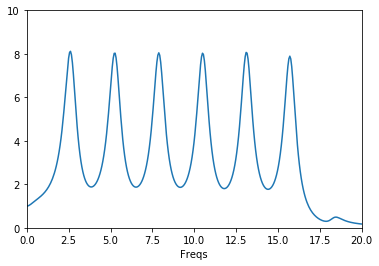

In [60]:
plt.xlim(0,20)
plt.ylim(0,1e1)
plt.xlabel('Freqs')
plt.plot(freqs,density_of_states)
#plt.plot(freqs,spl_density_of_states)
plt.show()

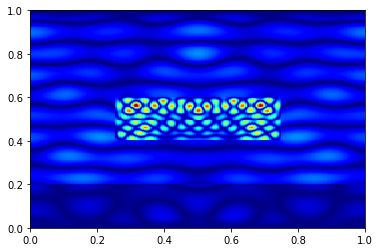

In [71]:
EH = np.fromfile('erg_1.bin',dtype=np.float64)
EH = EH.reshape(251,251).T
x = np.linspace(0,1,251)
z = np.linspace(0,1,251)
plt.xlim(0.,1.)
plt.ylim(0.,1.)
plt.pcolor(x,z,abs(Hy[:,:]),cmap='jet')
plt.show()

In [18]:
spl_density_of_states = density_of_states.copy()

In [41]:
source

0.0

In [3]:
c = 3e8
dx = 0.004

In [14]:
dt = 1/c/sqrt(2*(1/dx/4)**2)
dt

3.771236166328253e-11

In [29]:
1/5.25

0.19047619047619047

In [34]:
1/9.55

0.10471204188481674